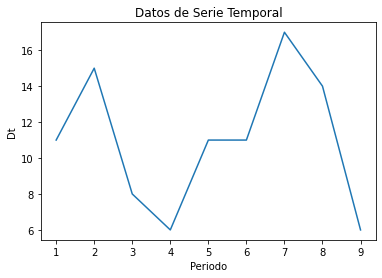

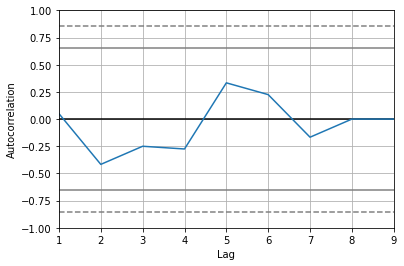

C:\Users\NITRO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\NITRO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\NITRO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\NITRO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\NITRO\anaconda3\lib\sit

                               SARIMAX Results                                
Dep. Variable:                     Dt   No. Observations:                    9
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -23.149
Date:                Sat, 07 Sep 2024   AIC                             52.299
Time:                        09:08:48   BIC                             52.537
Sample:                             0   HQIC                            50.691
                                  - 9                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2091      0.937      0.223      0.823      -1.628       2.046
ma.L1         -0.9999   1505.092     -0.001      0.999   -2950.927    2948.927
sigma2        15.1908   2.29e+04      0.001      0.9

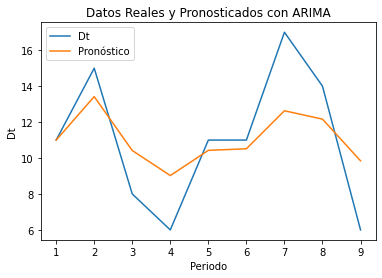

MAD: 2.014595985446988
MAPE: 22.63250949534688%
TS (Tracking Signal):
Periodo
1    0.000054
2    0.785245
3   -0.415464
4   -1.916993
5   -1.632957
6   -1.392426
7    0.776036
8    1.687116
9   -0.221291
Name: TS, dtype: float64
Rango de TS: [-1.9169933913116435, 1.687116336086461]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

# Datos proporcionados
data = {
    'Periodo': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Dt': [11, 15, 8, 6, 11, 11, 17, 14, 6]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Crear serie temporal con el periodo como índice
df.set_index('Periodo', inplace=True)

# Visualización de los datos
plt.plot(df['Dt'])
plt.title('Datos de Serie Temporal')
plt.xlabel('Periodo')
plt.ylabel('Dt')
plt.show()

# Visualizar autocorrelación para entender los rezagos
autocorrelation_plot(df['Dt'])
plt.show()

# Definir el modelo ARIMA (p,d,q)
# Puedes cambiar los valores de (p,d,q) según los resultados del autocorrelation_plot
model = ARIMA(df['Dt'], order=(1,1,1))  # (p,d,q) -> Aquí puedes ajustar según tu análisis
model_fit = model.fit()

# Resumen del modelo
print(model_fit.summary())

# Hacer pronósticos para los próximos períodos
forecast = model_fit.forecast(steps=3)  # Pronosticar los próximos 3 períodos
print(f"Pronósticos para los próximos períodos: \n{forecast}")

# Graficar los pronósticos
df['Pronóstico'] = model_fit.predict(start=1, end=len(df))
df[['Dt', 'Pronóstico']].plot()
plt.title('Datos Reales y Pronosticados con ARIMA')
plt.xlabel('Periodo')
plt.ylabel('Dt')
plt.show()

# Cálculo de MAD, MAPE y Tracking Signal (TS)
# Calcular el error (residuales)
df['Error'] = df['Dt'] - df['Pronóstico']

# Calcular MAD (Mean Absolute Deviation)
MAD = np.mean(np.abs(df['Error']))
print(f'MAD: {MAD}')

# Calcular MAPE (Mean Absolute Percentage Error)
# Evitar la división por cero
df['APE'] = np.abs(df['Error'] / df['Dt']) * 100
MAPE = np.mean(df['APE'])
print(f'MAPE: {MAPE}%')

# Calcular Tracking Signal (TS)
df['Cumulative Error'] = df['Error'].cumsum()
df['TS'] = df['Cumulative Error'] / MAD
print(f'TS (Tracking Signal):\n{df["TS"]}')

# Mostrar el rango de Tracking Signal
TS_min = df['TS'].min()
TS_max = df['TS'].max()
print(f'Rango de TS: [{TS_min}, {TS_max}]')
